# Legal Clause Classifier Demo

This notebook demonstrates the capabilities of the legal clause classifier.

In [ ]:
# Import the classifier
import os
import json
from classifier import classify_clauses, ModelType, DEFAULT_CLAUSE_TYPES

In [2]:
# Check if OpenAI API key is set
if not os.environ.get("OPENAI_API_KEY"):
    print("Warning: OPENAI_API_KEY environment variable is not set.")
    print("Please set it with: %env OPENAI_API_KEY=your_api_key_here")

## Basic Classification

Let's start with a simple example of classifying a legal text.

In [3]:
# Sample legal text
sample_text = """This agreement shall stay in effect until one party ends it with 30 days' notice. 

Both sides agree to keep information confidential for two years after the agreement ends. 

This agreement follows the laws of the Republic of Estonia."""

# Display the text
print("Sample Text:")
print(sample_text)
print()

Sample Text:
This agreement shall stay in effect until one party ends it with 30 days' notice. 

Both sides agree to keep information confidential for two years after the agreement ends. 

This agreement follows the laws of the Republic of Estonia.



In [5]:
# Classify the text
results = classify_clauses(sample_text)

# Display document summary
if "document_summary" in results:
    print("Document Summary:")
    print(results["document_summary"])
    print()

# Display metadata
if "metadata" in results:
    print("Metadata:")
    for key, value in results["metadata"].items():
        print(f"{key}: {value}")
    print()

# Display results
print("Classification Results:")
for i, result in enumerate(results.get("results", []), 1):
    print(f"\nResult {i}:")
    print(f"Clause: \"{result.get('clause', 'N/A')}\"")
    print(f"Label: {result.get('label', 'N/A')}")
    print(f"Confidence: {result.get('confidence', 'N/A')} ({result.get('confidence_level', 'N/A')})")
    print(f"Summary: {result.get('summary', 'N/A')}")

Sending request to model: ModelType.GPT_4


Metadata:
model: ModelType.GPT_4
clause_count: 3
clause_types: ['Termination', 'Confidentiality', 'Governing Law', 'Payment Terms', 'Liability', 'Intellectual Property']

Classification Results:

Result 1:
Clause: "This agreement shall stay in effect until one party ends it with 30 days' notice."
Label: Termination
Confidence: 0.95 (Very High)
Summary: Either party can end the agreement by giving 30 days' notice.

Result 2:
Clause: "Both sides agree to keep information confidential for two years after the agreement ends."
Label: Confidentiality
Confidence: 0.98 (Very High)
Summary: Both parties must keep information secret for two years after the agreement finishes.

Result 3:
Clause: "This agreement follows the laws of the Republic of Estonia."
Label: Governing Law
Confidence: 0.97 (Very High)
Summary: The laws of Estonia apply to this agreement.


Raw response from model: {
  "results": [
    {
      "clause": "This agreement shall stay in effect until one party ends it with 30 days' notice.",
      "label": "Termination",
      "confidence": 0.95,
      "summary": "Ei...


## Custom Clause Types

You can specify custom clause types to look for.

In [6]:
# Define custom clause types
custom_clause_types = ["Payment", "Delivery", "Warranty", "Termination"]

# Sample text with payment and delivery clauses
custom_text = """Payment shall be made within 30 days of invoice receipt.

Delivery shall be completed within 14 days of order confirmation.

The supplier warrants that the goods will be free from defects for a period of 12 months.

This agreement may be terminated by either party with 60 days' written notice."""

# Classify with custom clause types
custom_results = classify_clauses(custom_text, clause_types=custom_clause_types)

# Display results
print("Classification Results with Custom Clause Types:")
for i, result in enumerate(custom_results.get("results", []), 1):
    print(f"\nResult {i}:")
    print(f"Clause: \"{result.get('clause', 'N/A')}\"")
    print(f"Label: {result.get('label', 'N/A')}")
    print(f"Confidence: {result.get('confidence', 'N/A')} ({result.get('confidence_level', 'N/A')})")
    print(f"Summary: {result.get('summary', 'N/A')}")

Sending request to model: ModelType.GPT_4


Classification Results with Custom Clause Types:

Result 1:
Clause: "Payment shall be made within 30 days of invoice receipt."
Label: Payment
Confidence: 0.98 (Very High)
Summary: The buyer must pay within 30 days after receiving the invoice.

Result 2:
Clause: "Delivery shall be completed within 14 days of order confirmation."
Label: Delivery
Confidence: 0.98 (Very High)
Summary: The goods or services must be delivered within 14 days after the order is confirmed.

Result 3:
Clause: "The supplier warrants that the goods will be free from defects for a period of 12 months."
Label: Warranty
Confidence: 0.99 (Very High)
Summary: The supplier guarantees the goods will not have defects for 12 months.

Result 4:
Clause: "This agreement may be terminated by either party with 60 days' written notice."
Label: Termination
Confidence: 0.98 (Very High)
Summary: Either party can end the agreement by giving 60 days' written notice.


Raw response from model: {
  "results": [
    {
      "clause": "Payment shall be made within 30 days of invoice receipt.",
      "label": "Payment",
      "confidence": 0.98,
      "summary": "The buyer must pay within 30 da...


## Model Comparison

Compare the results from different models.

In [7]:
# Sample text for comparison
comparison_text = "This agreement shall be governed by the laws of the State of California."

# Classify with GPT-4.1
gpt41_results = classify_clauses(comparison_text, model="gpt-4.1")

# Classify with GPT-4.1-mini
gpt41mini_results = classify_clauses(comparison_text, model="gpt-4.1-mini-2025-04-14")

# Display GPT-4.1 results
print("GPT-4.1 Results:")
for result in gpt41_results.get("results", []):
    print(f"Label: {result.get('label', 'N/A')}")
    print(f"Confidence: {result.get('confidence', 'N/A')} ({result.get('confidence_level', 'N/A')})")
    print(f"Summary: {result.get('summary', 'N/A')}")
    print()

# Display GPT-4.1-mini results
print("GPT-4.1-mini Results:")
for result in gpt41mini_results.get("results", []):
    print(f"Label: {result.get('label', 'N/A')}")
    print(f"Confidence: {result.get('confidence', 'N/A')} ({result.get('confidence_level', 'N/A')})")
    print(f"Summary: {result.get('summary', 'N/A')}")

Sending request to model: gpt-4.1
Raw response from model: {
  "clause": "This agreement shall be governed by the laws of the State of California.",
  "label": "Governing Law",
  "confidence": 0.97,
  "summary": "California law applies to this agreement."
}...
Could not parse results from model response, using pattern matching as fallback
Sending request to model: gpt-4.1-mini-2025-04-14


GPT-4.1 Results:
Label: Governing Law
Confidence: 0.8 (High)
Summary: Legal clause related to Governing Law

GPT-4.1-mini Results:
Label: Governing Law
Confidence: 0.8 (High)
Summary: Legal clause related to Governing Law


Raw response from model: 
{
  "clause": "This agreement shall be governed by the laws of the State of California.",
  "label": "Governing Law",
  "confidence": 0.97,
  "summary": "California law applies to this agreement."
}...
Could not parse results from model response, using pattern matching as fallback


## Analyzing a Complex Contract

Let's analyze a more complex contract with multiple clauses.

In [8]:
# Complex contract example
complex_contract = """
CONSULTING AGREEMENT

1. SERVICES. Consultant agrees to provide the following services: technical consulting and advisory services related to software development.

2. PAYMENT. Client shall pay Consultant $150 per hour, invoiced monthly. Payment is due within 15 days of invoice receipt.

3. TERM. This Agreement shall commence on the Effective Date and continue for a period of 12 months, unless terminated earlier.

4. TERMINATION. Either party may terminate this Agreement with 30 days' written notice. Client shall pay for all services rendered up to the termination date.

5. CONFIDENTIALITY. Consultant shall maintain the confidentiality of all proprietary information for a period of 5 years after termination of this Agreement.

6. INTELLECTUAL PROPERTY. All work product created by Consultant shall be the sole property of Client.

7. GOVERNING LAW. This Agreement shall be governed by the laws of the State of Delaware.

8. LIABILITY. Consultant's liability shall be limited to the total fees paid under this Agreement.
"""

# Classify the complex contract
complex_results = classify_clauses(complex_contract)

# Display document summary
if "document_summary" in complex_results:
    print("Document Summary:")
    print(complex_results["document_summary"])
    print()

# Display results in a more compact format
print("Classification Results:")
for i, result in enumerate(complex_results.get("results", []), 1):
    print(f"\n{i}. {result.get('label', 'N/A')} ({result.get('confidence_level', 'N/A')})")
    print(f"   Clause: \"{result.get('clause', 'N/A')}\"")
    print(f"   Summary: {result.get('summary', 'N/A')}")

Sending request to model: ModelType.GPT_4


Classification Results:

1. Intellectual Property (Moderate)
   Clause: "Consultant agrees to provide the following services: technical consulting and advisory services related to software development."
   Summary: The consultant will provide technical consulting and advisory services for software development.

2. Payment Terms (Very High)
   Clause: "Client shall pay Consultant 150 per hour, invoiced monthly."
   Summary: The client will pay the consultant $150 per hour, billed monthly.

3. Payment Terms (Very High)
   Clause: "Payment is due within 15 days of invoice receipt."
   Summary: The client must pay invoices within 15 days of receiving them.

4. Termination (High)
   Clause: "This Agreement shall commence on the Effective Date and continue for a period of 12 months, unless terminated earlier."
   Summary: The agreement lasts 12 months unless ended sooner.

5. Termination (Very High)
   Clause: "Either party may terminate this Agreement with 30 days' written notice."
   Summa

Raw response from model: {
  "results": [
    {
      "clause": "Consultant agrees to provide the following services: technical consulting and advisory services related to software development.",
      "label": "Intellectual ...


## Visualizing Results

Let's create a simple visualization of the classification results.

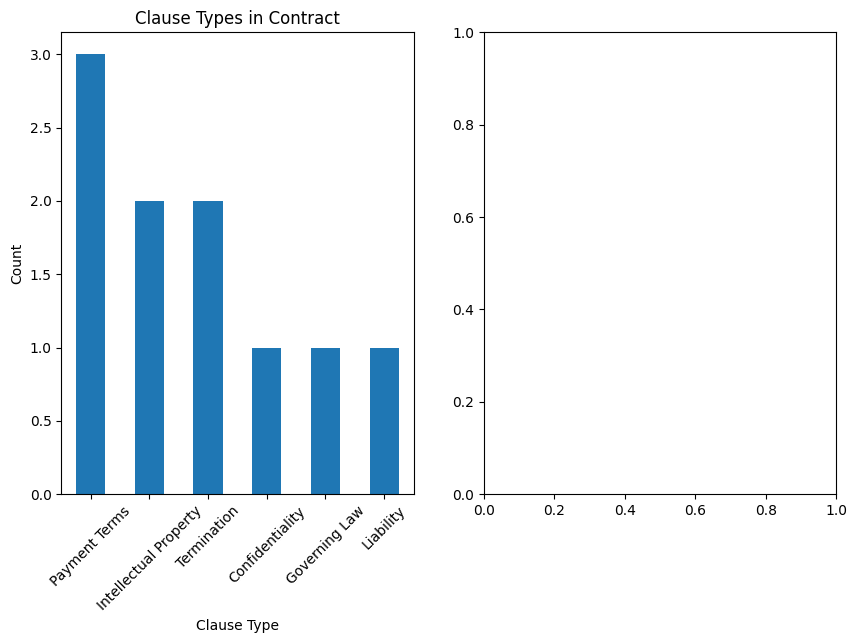

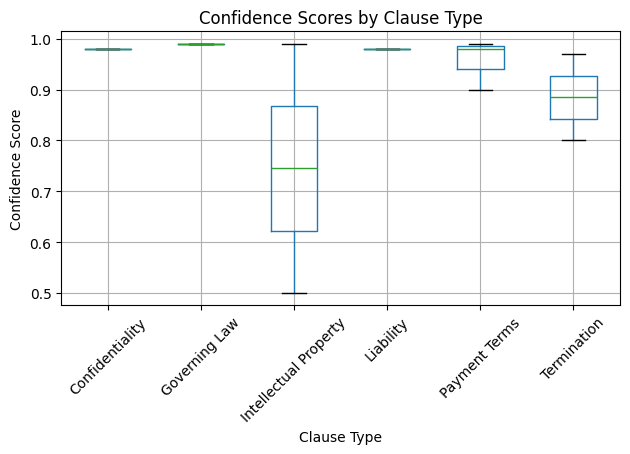

In [9]:
# Import visualization libraries
import matplotlib.pyplot as plt
import pandas as pd

# Extract data from complex contract results
labels = []
confidences = []

for result in complex_results.get("results", []):
    labels.append(result.get("label", "Unknown"))
    confidences.append(result.get("confidence", 0))

# Create a DataFrame
df = pd.DataFrame({
    "Label": labels,
    "Confidence": confidences
})

# Group by label and count
label_counts = df["Label"].value_counts()

# Plot the results
plt.figure(figsize=(10, 6))

# Bar chart of clause types
plt.subplot(1, 2, 1)
label_counts.plot(kind="bar")
plt.title("Clause Types in Contract")
plt.xlabel("Clause Type")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Box plot of confidence scores
plt.subplot(1, 2, 2)
df.boxplot(column="Confidence", by="Label")
plt.title("Confidence Scores by Clause Type")
plt.suptitle("")
plt.xlabel("Clause Type")
plt.ylabel("Confidence Score")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()